In [834]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from scipy.stats import ttest_1samp
sys.path.append('../../')
import Constants as c
from scipy.stats import shapiro
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats import weightstats as stests

In [835]:
file = "calculate_metrics_h1_ML_combined.csv"
df = pd.read_csv(file)

In [836]:
df.drop(df.columns[0], axis=1)
df.dropna(subset=[c.PRED_25], inplace=True)
df.dropna(subset=[c.PRED_50], inplace=True)
df = df.sample(n=500)

In [837]:
def gaussian_test(data, alpha):
    stat, p = shapiro(data)
    print("Shapiro p-value: ", round(p, 4))

    is_gaussian = True

    if p > alpha:
        print('Shapiro Test: Sample looks Gaussian (fail to reject H0)')
    else:
        is_gaussian = False
        print('Shapiro Test: Sample does not look Gaussian (reject H0)')
    
    return is_gaussian

In [838]:
def one_sample_t_test(data, mean, alpha):
    model_records_mean = round(data.mean(),2)

    ttest_result = ttest_1samp(data, mean)
    print("One Sample T-test p-value: ", round(ttest_result.pvalue / 2, 4))
    
    if ttest_result.pvalue / 2 < alpha:
        print("One Sample T-Test: {0} sample mean is likely to be greater than {1} (fail to reject H0)".format(model_records_mean, mean))
    else:
        print("One Sample T-Test: {0} sample mean is not likely to be greater than {1} (reject H0)".format(model_records_mean, mean))

In [839]:
def one_sample_z_test(data, mean, alpha):
    model_records_mean = round(data.mean(),2)
    
    ztest_result = stests.ztest(data, x2=None, value=mean)[1]
    print("One Sample Z-test p-value: ", round(ztest_result / 2, 4))

    if ztest_result / 2 < alpha:
        print("One Sample Z-Test: {0} sample mean is likely to be greater than {1} (fail to reject H0)".format(model_records_mean, mean))
    else:
        print("One Sample Z-Test: {0} sample mean is not likely to be greater than {1} (reject H0)".format(model_records_mean, mean))

In [840]:
def one_sample_sign_test(data, mean, alpha):
    model_records_mean = round(data.mean(),2)
    
    sign_test_result  = sign_test(data, mean)[1]
    print("One Sample Sign Test p-value: ", sign_test_result)

    if sign_test_result / 2 < alpha:
        print("One Sample Sign Test: {0} sample median is likely to be greater than {1} (fail to reject H0)".format(model_records_mean, mean))
    else:
        print("One Sample Sign Test: {0} sample median is not likely to be greater than {1} (reject H0)".format(model_records_mean, mean))

In [841]:
def hypothesisTest_Effort(model, task, pred, mean):
    print("Hypothesis test for {0} and task = '{1}'".format(model, task))
    
    model_records = None

    if task != "ALL":
        filter1 = df[c.MODEL] == model
        filter2 = df[c.TASK] == task
        model_records = df[filter1 & filter2]
    else:
        model_records = df

    num_records = len(model_records)
    model_records_mean = round(model_records[pred].mean(),2)

    print("Number of records: {0}".format(num_records))
    print("Sample mean: ", model_records_mean)
    
    alpha = 0.10
    is_gaussian = gaussian_test(model_records[pred], alpha)

    if is_gaussian:
        if num_records <= 60:
            one_sample_t_test(model_records[pred], mean, alpha)
        else:
            one_sample_z_test(model_records[pred], mean, alpha)
    else:
        one_sample_sign_test(model_records[pred], mean, alpha)

    plt.figure(figsize=(8,3))
    plt.tight_layout()
    sb.distplot(model_records[pred], kde=False, bins=10)


In [842]:
task = "BUG"

Hypothesis test for Line and task = 'BUG'
Number of records: 31
Sample mean:  0.4
Shapiro p-value:  0.2019
Shapiro Test: Sample looks Gaussian (fail to reject H0)
One Sample T-test p-value:  0.0792
One Sample T-Test: 0.4 sample mean is likely to be greater than 0.33 (fail to reject H0)


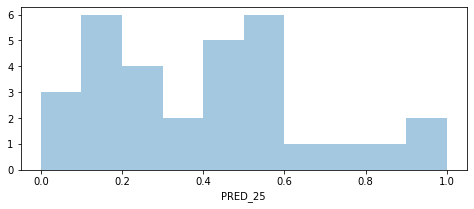

In [843]:
# t-test
hypothesisTest_Effort(c.LINE, task, c.PRED_25, 0.33)

Hypothesis test for Line and task = 'BUG'
Number of records: 31
Sample mean:  0.53
Shapiro p-value:  0.5414
Shapiro Test: Sample looks Gaussian (fail to reject H0)
One Sample T-test p-value:  0.0788
One Sample T-Test: 0.53 sample mean is likely to be greater than 0.6 (fail to reject H0)


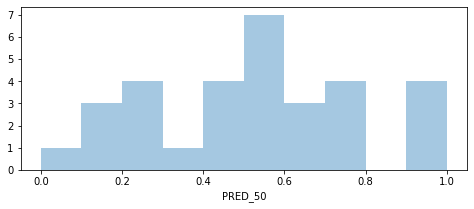

In [844]:
hypothesisTest_Effort(c.LINE, task, c.PRED_50, 0.60)

Hypothesis test for Module and task = 'BUG'
Number of records: 41
Sample mean:  0.6
Shapiro p-value:  0.1976
Shapiro Test: Sample looks Gaussian (fail to reject H0)
One Sample T-test p-value:  0.0364
One Sample T-Test: 0.6 sample mean is likely to be greater than 0.53 (fail to reject H0)


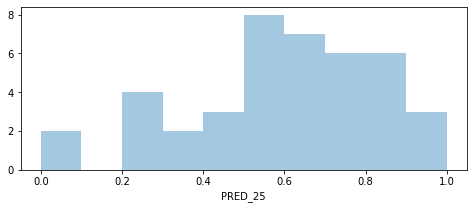

In [845]:
# t-test
hypothesisTest_Effort(c.MODULE, task, c.PRED_25, 0.53)

Hypothesis test for Module and task = 'BUG'
Number of records: 41
Sample mean:  0.78
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  0.05958388801809635
One Sample Sign Test: 0.78 sample median is likely to be greater than 0.87 (fail to reject H0)


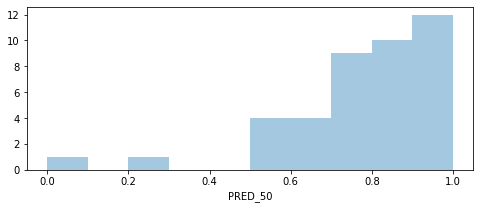

In [846]:
hypothesisTest_Effort(c.MODULE, task, c.PRED_50, 0.87)